In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
plt.tight_layout()
plt.show()

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<Figure size 640x480 with 0 Axes>

In [2]:
df = pd.read_csv('global_freelancers_raw.csv', encoding= 'unicode_escape')
df.head()

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [3]:
print(f"Number or rows : {df.shape[0]}\nNumber of columns: {df.shape[1]}")
print("_____________________________________________________")
print(df.info())
print("_____________________________________________________")

pd.isnull(df).sum()

Number or rows : 1000
Number of columns: 12
_____________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB
None
______________________________________

freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64

In [4]:
### cleaning gender
def clean_gender(x):
    if pd.isna(x): return np.nan
    x = x.lower().strip()
    if 'f' in x: return 'female'
    if 'm' in x: return 'male'
    return 'other'

df['gender'] = df['gender'].apply(clean_gender)


### Clean 'hourly_rate' and remove $, USD
df['hourly_rate_clean'] = df['hourly_rate (USD)'].astype(str)\
    .str.replace(r'[^0-9.]', '', regex=True)\
    .replace('', np.nan)\
    .astype(float)


### 3. Standardize 'client_satisfaction' - remove '%'
df['client_satisfaction_clean'] = df['client_satisfaction']\
    .str.replace('%', '', regex=False)\
    .astype(float)


### 4. Clean 'is_active' - convert to binary
df['is_active_clean'] = df['is_active'].astype(str).str.strip().str.lower()
df['is_active_clean'] = df['is_active_clean'].map({'1': 1, '0': 0, 'n': 0, 'y': 1}).fillna(0).astype(int)


### 5. Handle 'rating' issues
# Convert 0.0 or NaN to just NaN if desired
df['rating_clean'] = df['rating'].replace(0.0, np.nan)


In [5]:
df_cleaned = df.drop(columns=[
    'hourly_rate (USD)', 'client_satisfaction', 'is_active', 'rating'
])
# Numrical Imputation 
df['rating_clean'] = df['rating_clean'].fillna(df['rating_clean'].mean())  
# Categorical Imputation
df['gender'] = df['gender'].fillna('other')

# Exploratory Data Analysis

In [6]:
# Numerical summary
df_cleaned.describe(include=[np.number])

,age,years_of_experience,hourly_rate_clean,client_satisfaction_clean,is_active_clean,rating_clean
count,970.000000,949.000000,906.000000,824.000000,1000.000000,754.000000
mean,40.509278,11.340358,52.461369,79.269417,0.284000,2.995756
std,11.942605,9.680610,27.323742,11.495162,0.451162,1.184543
min,20.000000,0.000000,20.000000,60.000000,0.000000,1.000000
25%,31.000000,3.000000,30.000000,69.750000,0.000000,2.000000
50%,41.000000,9.000000,40.000000,79.000000,0.000000,3.000000
75%,51.000000,17.000000,75.000000,89.000000,1.000000,4.000000
max,60.000000,41.000000,100.000000,100.000000,1.000000,5.000000


### Univariate EDA

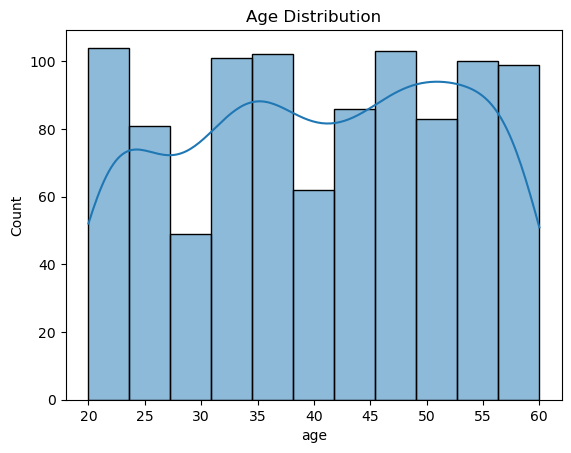

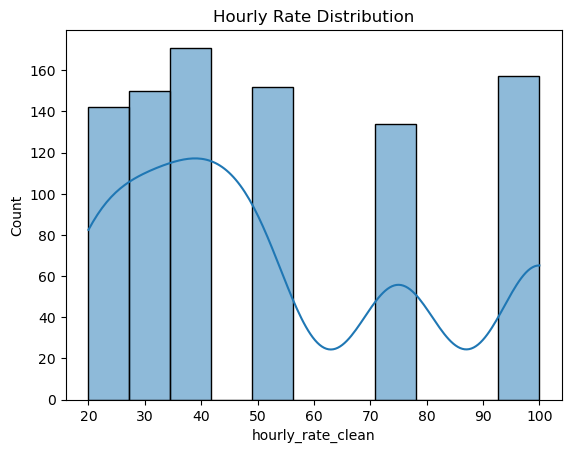

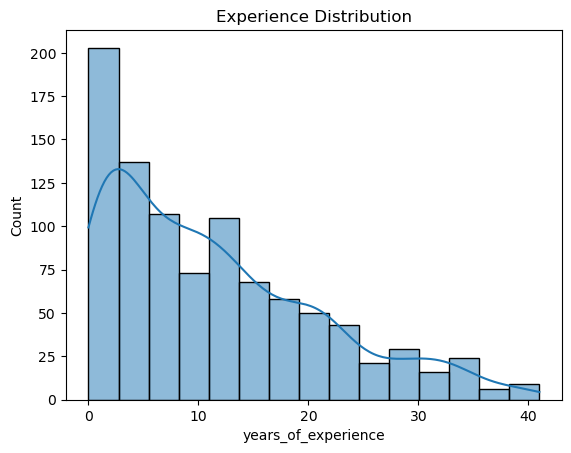

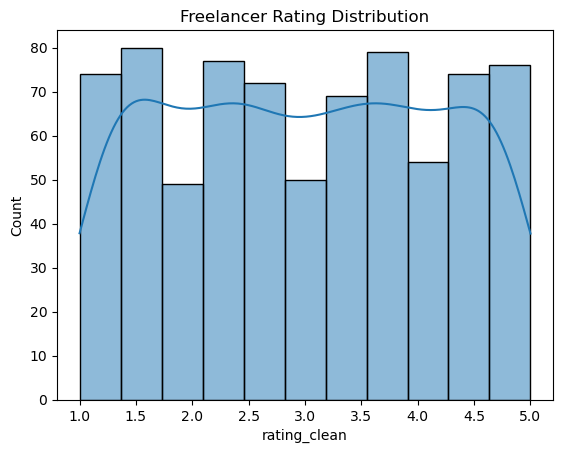

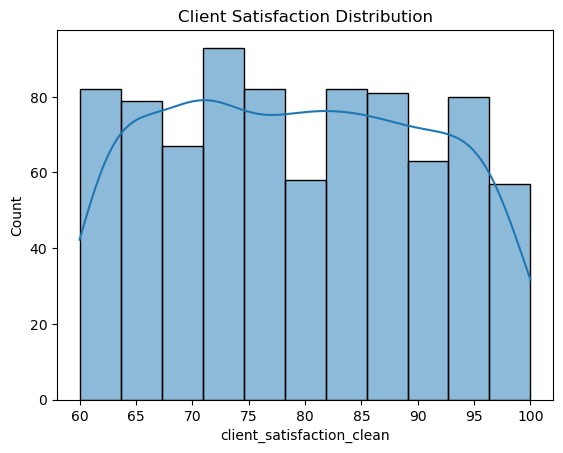

In [7]:
# Age
sns.histplot(df_cleaned['age'], kde=True).set_title("Age Distribution")
plt.show()

# Hourly Rate
sns.histplot(df_cleaned['hourly_rate_clean'], kde=True).set_title("Hourly Rate Distribution")
plt.show()

# Years of Experience
sns.histplot(df_cleaned['years_of_experience'], kde=True).set_title("Experience Distribution")
plt.show()

# Rating
sns.histplot(df_cleaned['rating_clean'], kde=True).set_title("Freelancer Rating Distribution")
plt.show()

# Client Satisfaction
sns.histplot(df_cleaned['client_satisfaction_clean'], kde=True).set_title("Client Satisfaction Distribution")
plt.show()

### Bivariate and Multivariate EDA

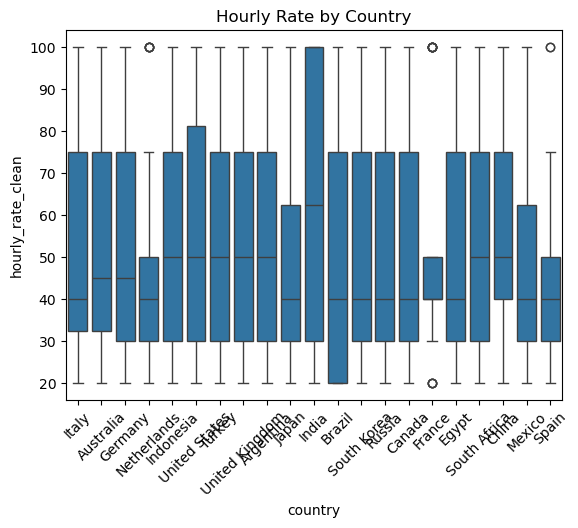

In [8]:
# Hourly Rate by Country
sns.boxplot(data=df_cleaned, x='country', y='hourly_rate_clean')
plt.title("Hourly Rate by Country")
plt.xticks(rotation=45)
plt.show()

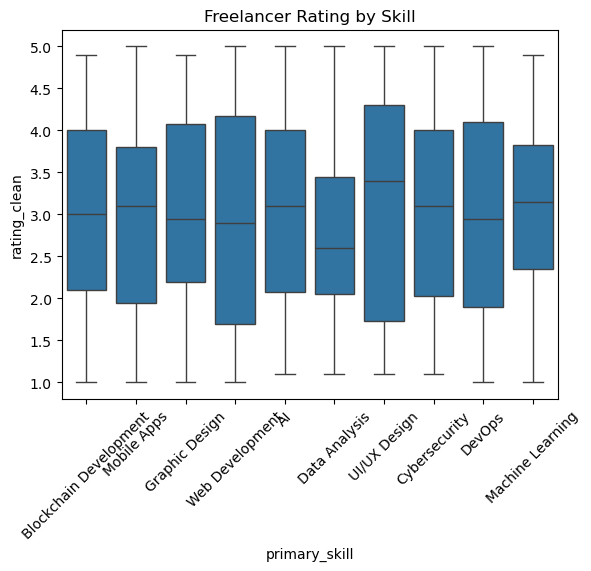

In [9]:
#  Rating by Skill
sns.boxplot(data=df_cleaned, x='primary_skill', y='rating_clean')
plt.xticks(rotation=45)
plt.title("Freelancer Rating by Skill")
plt.show()

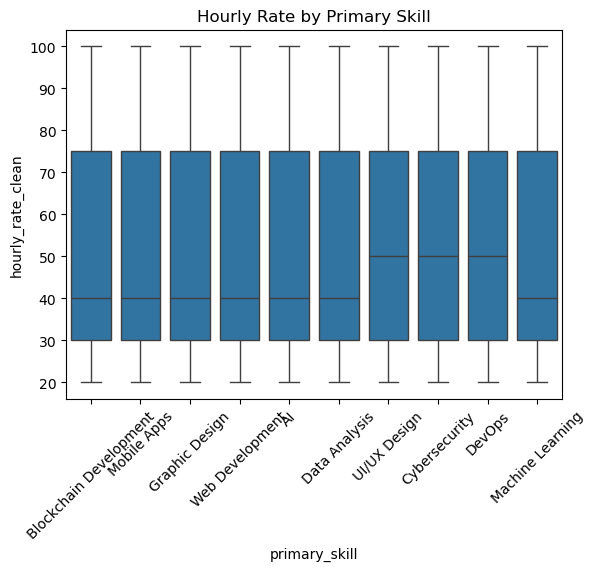

In [10]:

sns.boxplot(data=df_cleaned, x='primary_skill', y='hourly_rate_clean')
plt.xticks(rotation=45)
plt.title('Hourly Rate by Primary Skill')
plt.show()

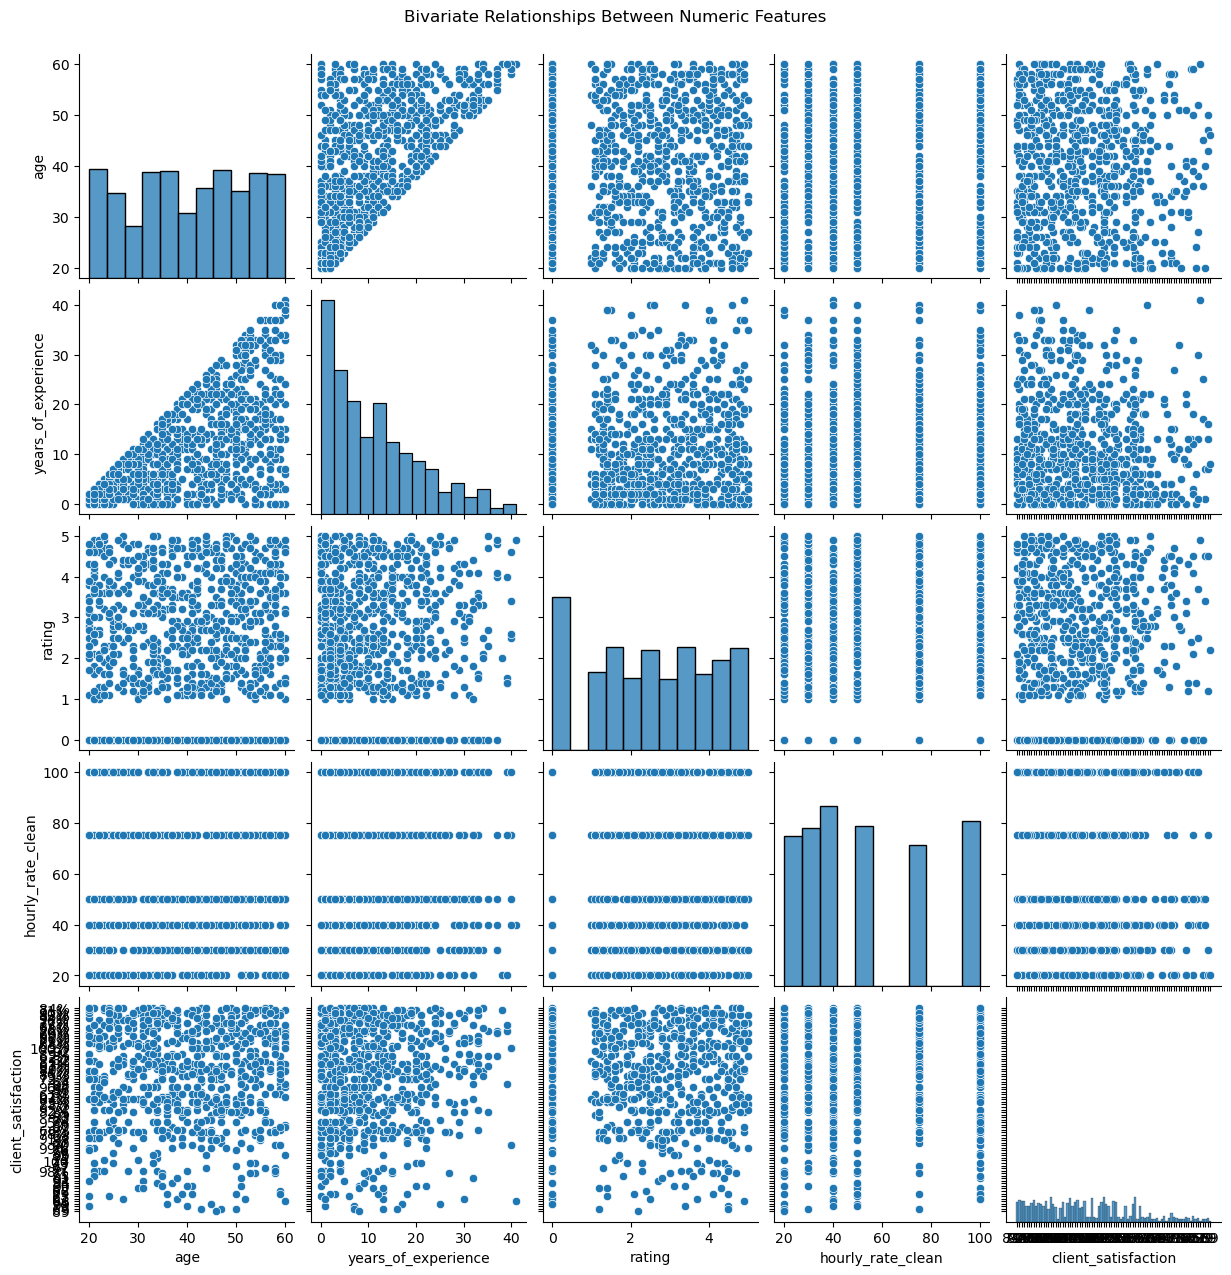

In [11]:
numeric_cols = ['age', 'years_of_experience', 'rating', 'hourly_rate_clean', 'client_satisfaction']

sns.pairplot(data=df, vars=numeric_cols)

plt.suptitle('Bivariate Relationships Between Numeric Features', y=1.02) # Global title for the entire pair plot
plt.show()

# Predictor Model

Random Forest Regressor R^2 Score: -0.24


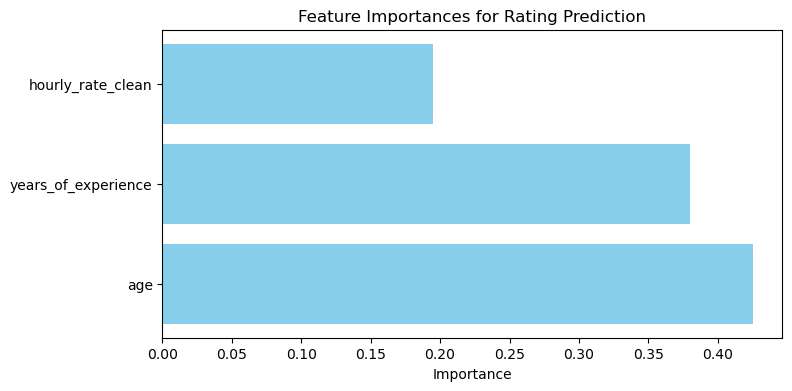

In [12]:
# Import libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Select features and target
features = ['age', 'years_of_experience', 'hourly_rate_clean']
target = 'rating'

# Prepare data by dropping rows with missing values in selected columns
model_df = df[features + [target]].dropna()

X = model_df[features]
y = model_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regressor R^2 Score: {r2:.2f}')

# Plot Feature Importances using a horizontal bar chart
feature_importances = regressor.feature_importances_
plt.figure(figsize=(8, 4))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for Rating Prediction')
plt.show()

# Freelancer Segmentation

##### Use case: Benefit
##### Targeted training campaigns: Offer skill-specific workshops to clusters with low experience but high engagement.
##### Retention strategies: Focus incentives on clusters with high ratings but declining activity.
##### Market expansion: Identify countries with high satisfaction for new freelancer recruitment drives.
##### Performance improvement plans: Target clusters with low ratings and satisfaction for mentorship programs.

### Feature Selection 

In [13]:
# Select features for clustering
cluster_df = df_cleaned[[
    'years_of_experience',
    'hourly_rate_clean',
    'rating_clean',
    'client_satisfaction_clean',
    'primary_skill',
    'country'
]].copy()

In [14]:
numerical_features = ['years_of_experience', 'hourly_rate_clean', 'rating_clean', 'client_satisfaction_clean']
imputer = SimpleImputer(strategy='mean')
cluster_df[numerical_features] = imputer.fit_transform(cluster_df[numerical_features])

### Preprocessing and Encoding

In [15]:
cluster_df_encoded = pd.get_dummies(cluster_df, columns=['primary_skill', 'country'], drop_first=True)

In [16]:
# Standardize numerical features
scaler = StandardScaler()
cluster_df_encoded[numerical_features] = scaler.fit_transform(cluster_df_encoded[numerical_features])

In [17]:
# PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cluster_df_encoded)

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   freelancer_ID              1000 non-null   object 
 1   name                       1000 non-null   object 
 2   gender                     1000 non-null   object 
 3   age                        970 non-null    float64
 4   country                    1000 non-null   object 
 5   language                   1000 non-null   object 
 6   primary_skill              1000 non-null   object 
 7   years_of_experience        949 non-null    float64
 8   hourly_rate_clean          906 non-null    float64
 9   client_satisfaction_clean  824 non-null    float64
 10  is_active_clean            1000 non-null   int32  
 11  rating_clean               754 non-null    float64
dtypes: float64(5), int32(1), object(6)
memory usage: 90.0+ KB


In [19]:
# Targeted training campaigns: Low experience, high engagement
kmeans_training = KMeans(n_clusters=4, random_state=42)
cluster_labels_training = kmeans_training.fit_predict(cluster_df_encoded)
df_cleaned['training_cluster'] = cluster_labels_training
training_summary = df_cleaned.groupby('training_cluster').agg({
    'freelancer_ID': 'count',
    'years_of_experience': 'mean',
    'client_satisfaction_clean': 'mean',
    'is_active_clean': 'mean'
}).rename(columns={'freelancer_ID': 'count'}).round(2)
training_target = training_summary[training_summary['years_of_experience'] < training_summary['years_of_experience'].mean() * 0.5]
training_target = training_target[training_target['client_satisfaction_clean'] > training_summary['client_satisfaction_clean'].mean()]
print("Targeted Training Clusters:")
print(training_target)

Targeted Training Clusters:
Empty DataFrame
Columns: [count, years_of_experience, client_satisfaction_clean, is_active_clean]
Index: []


C:\Users\kshat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


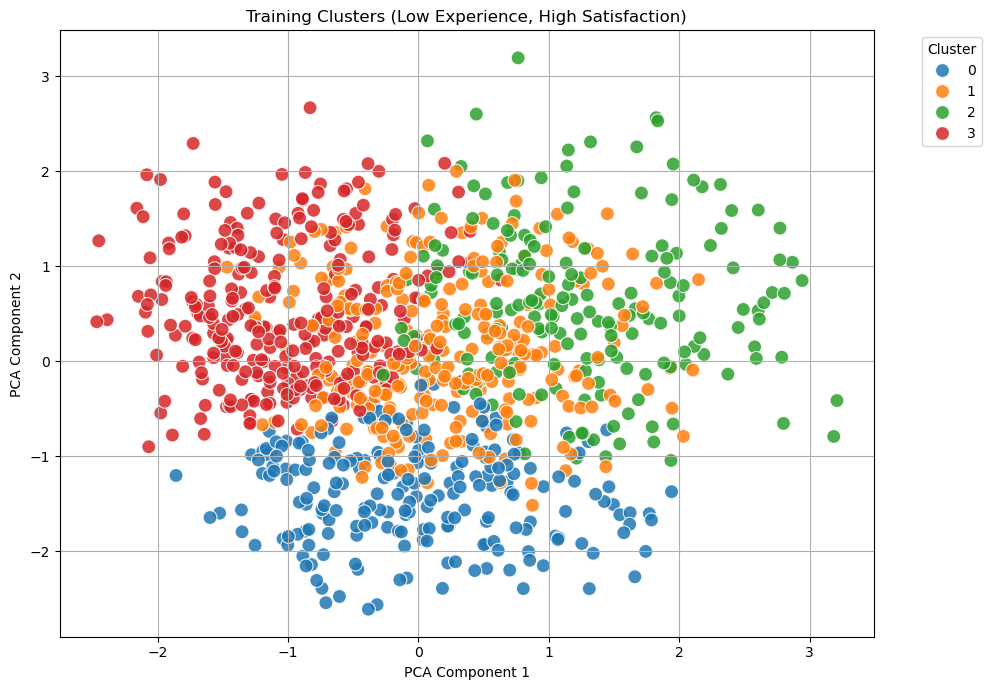

In [20]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_cleaned['training_cluster'],
                palette='tab10', s=100, alpha=0.85)
plt.title("Training Clusters (Low Experience, High Satisfaction)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\kshat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Retention Clusters:
                   count  rating_clean  is_active_clean
retention_cluster                                      
3                    297           3.3             0.27


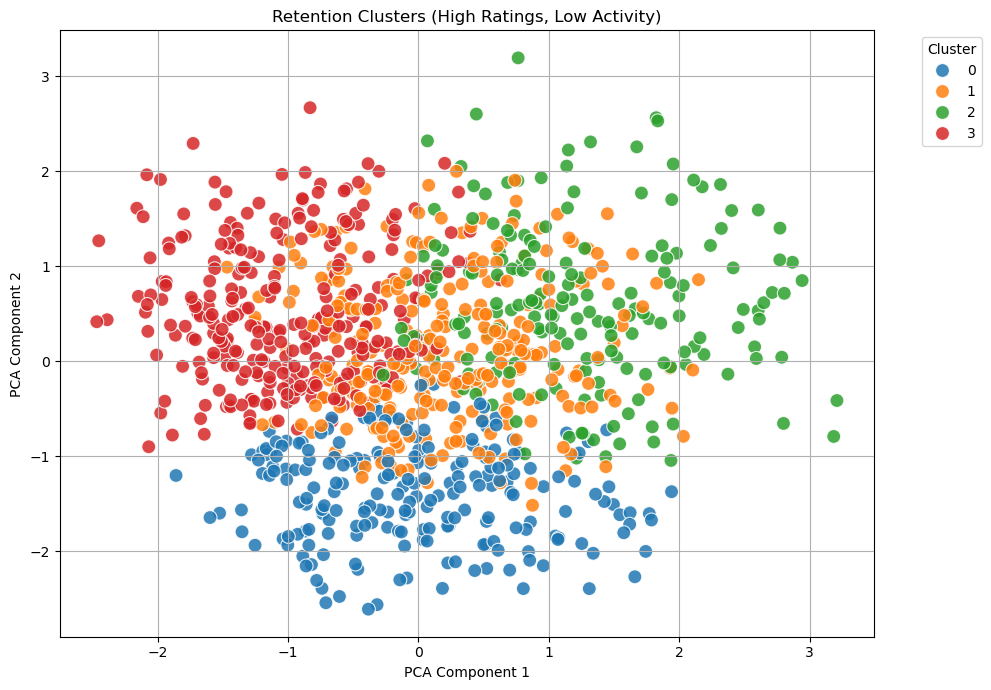

In [21]:
kmeans_retention = KMeans(n_clusters=4, random_state=42)
cluster_labels_retention = kmeans_retention.fit_predict(cluster_df_encoded)
df_cleaned['retention_cluster'] = cluster_labels_retention
retention_summary = df_cleaned.groupby('retention_cluster').agg({
    'freelancer_ID': 'count',
    'rating_clean': 'mean',
    'is_active_clean': 'mean'
}).rename(columns={'freelancer_ID': 'count'}).round(2)
retention_target = retention_summary[retention_summary['rating_clean'] > retention_summary['rating_clean'].mean()]
retention_target = retention_target[retention_target['is_active_clean'] < retention_summary['is_active_clean'].mean()]
print("Retention Clusters:")
print(retention_target)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_cleaned['retention_cluster'],
                palette='tab10', s=100, alpha=0.85)
plt.title("Retention Clusters (High Ratings, Low Activity)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Market expansion: High satisfaction countries
satisfaction_by_country = df_cleaned.groupby('country')['client_satisfaction_clean'].mean().sort_values(ascending=False)
expansion_target = satisfaction_by_country[satisfaction_by_country > satisfaction_by_country.mean()]
print("Market Expansion Countries:")
print(expansion_target)

Market Expansion Countries:
country
Egypt             82.228571
United States     81.414634
India             81.342857
Spain             80.973684
Argentina         80.789474
Australia         80.644444
Mexico            80.292683
Russia            80.282051
South Korea       79.716981
United Kingdom    79.365854
Name: client_satisfaction_clean, dtype: float64


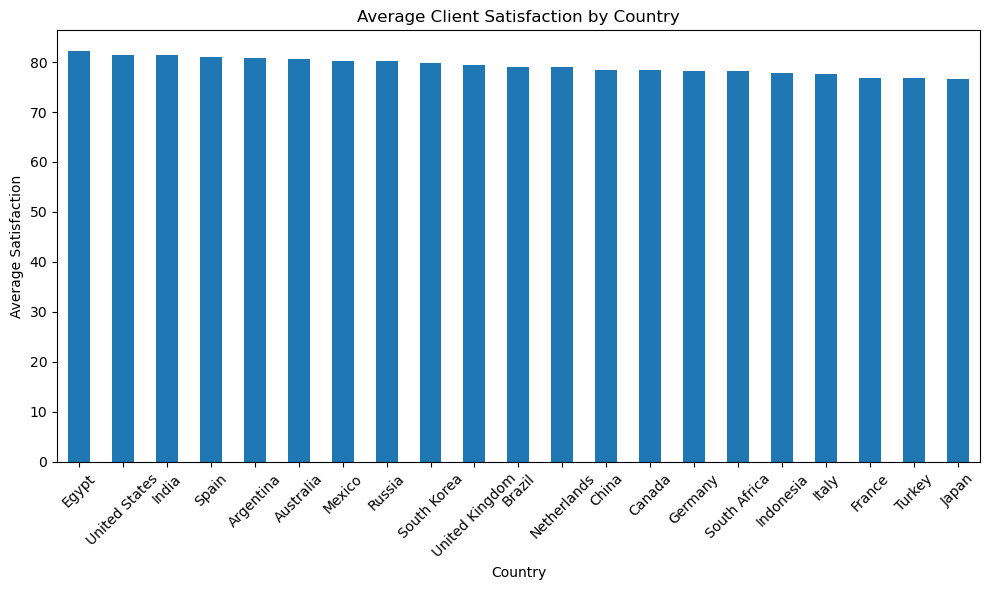

In [23]:
plt.figure(figsize=(10, 6))
satisfaction_by_country.plot(kind='bar')
plt.title("Average Client Satisfaction by Country")
plt.xlabel("Country")
plt.ylabel("Average Satisfaction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
kmeans_performance = KMeans(n_clusters=4, random_state=42)
cluster_labels_performance = kmeans_performance.fit_predict(cluster_df_encoded)
df_cleaned['performance_cluster'] = cluster_labels_performance
performance_summary = df_cleaned.groupby('performance_cluster').agg({
    'freelancer_ID': 'count',
    'rating_clean': 'mean',
    'client_satisfaction_clean': 'mean'
}).rename(columns={'freelancer_ID': 'count'}).round(2)
performance_target = performance_summary[performance_summary['rating_clean'] < performance_summary['rating_clean'].mean()]
performance_target = performance_target[performance_target['client_satisfaction_clean'] < performance_summary['client_satisfaction_clean'].mean()]
print("Performance Improvement Clusters:")
print(performance_target)

Performance Improvement Clusters:
                     count  rating_clean  client_satisfaction_clean
performance_cluster                                                
0                      217           1.7                      72.65


C:\Users\kshat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


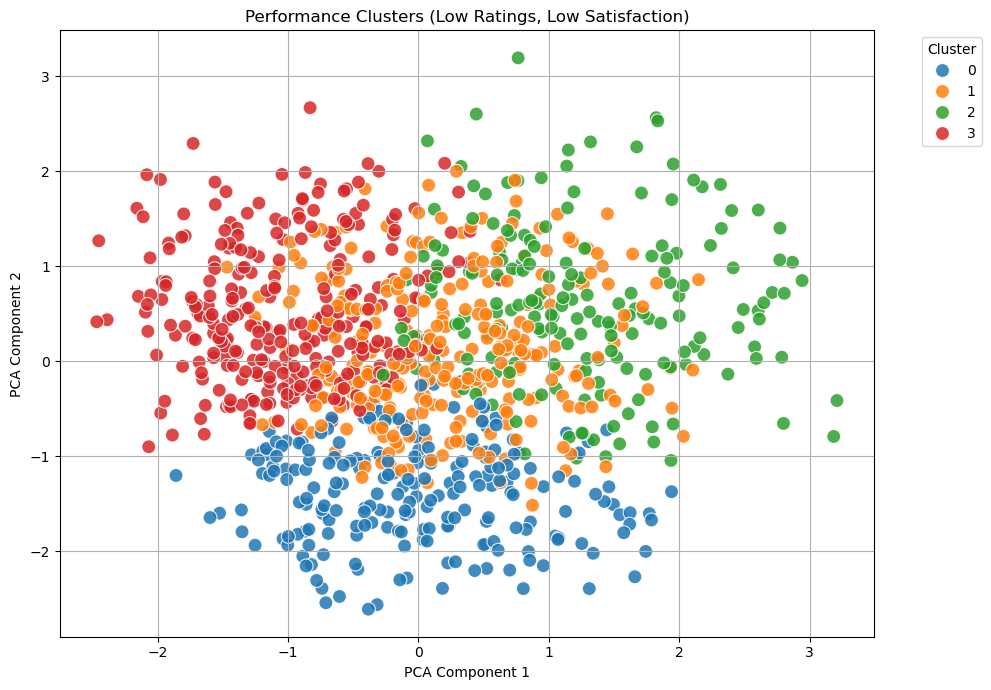

In [25]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_cleaned['performance_cluster'],
                palette='tab10', s=100, alpha=0.85)
plt.title("Performance Clusters (Low Ratings, Low Satisfaction)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()